# Multilayer Perceptron

## Step Function

In [1]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

Let's test this `step_function`.

In [3]:
step_function(-200)

0

In [7]:
inputs = [1, 200, -2, 0, 500]

In [8]:
for input in inputs:
    print(f'input is {input}, and output of step_function is {step_function(input)}')

input is 1, and output of step_function is 1
input is 200, and output of step_function is 1
input is -2, and output of step_function is 0
input is 0, and output of step_function is 0
input is 500, and output of step_function is 1


Let's improve `step_function` to process multiple items using `numpy`.

Let's practice numpy before we implement a new `step_function`.

In [9]:
import numpy as np

In [11]:
x = np.array([1, 200, -2, 0, 500])
x > 0

array([ True,  True, False, False,  True])

In [12]:
(x > 0).astype(int)

array([1, 1, 0, 0, 1])

In [15]:
# step_function numpy version
def step_function(x):
    return (x > 0).astype(int)

In [16]:
step_function(x)

array([1, 1, 0, 0, 1])

Let's plot `step_function`. If you don't have `matplotlib` yet, install it from `pypi.org' or `anaconda.org`.

In [18]:
import matplotlib.pyplot as plt

In [19]:
x = np.arange(-10.0, 10.0, 0.1)
y = step_function(x)

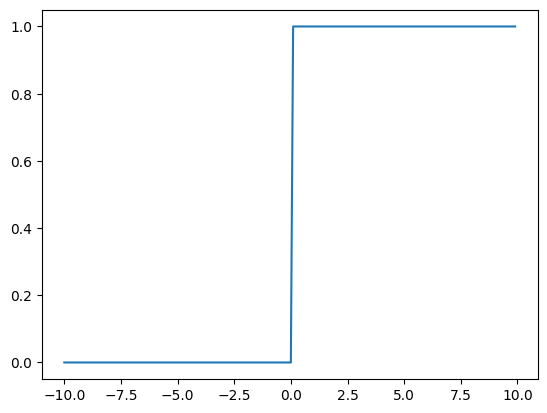

In [22]:
plt.plot(x, y)